
# Database of indoor $CO_2$ measurements

### Santiago Correa Restrepo
### santiagocorrea251469@correo.itm.edu.co

---

<br/>

# Abstract

The accumulation of carbon dioxide ($CO_2$), in the atmospheric in recent years has increscent, in addition to dangerous represent this gas when stay indoor site. This is a grant theme for discussion in ambient security y health. This situation motivates to develop of new technologies accessible, accuracy and sustainable for monitoring them.

The high concentration of $CO_2$, when exceed the **1000ppm**, have noxious effect in human health and cognitive performance. The high concentration of CO2, when exceed the 1000ppm, have noxious effect in human health and cognitive performance. These effects are intensified in unventilated environments, as classrooms, offices, homes, laboratories and mines.

An initiative develop is [indoorco2map.com](https://indoorco2map.com/?lat=48.37962&lng=12.63897&zoom=3.36), this project creates a map for all world (greater presence in Europe) about concentration of $CO_2$ inside commercial establishments. Also, the creator has an application for android in the Google Play Store when all people can contribute and search CO2 concentration in your favorite commercial site.

This experiment seeks to use the Database of indoorco2map for analyzing the behavior of CO2 in enclosed spaces. Tests are carried out to visualize the information about the dataset in a matrix for facilitate the operation with data. 

# Introduction

Carbon dioxide is a colorless, odorless, tasteless gas, which makes it imperceptible to the senses. It is a gas with a molecular composition of one carbon atomic and two oxygen atoms, with a weight of 44.0095 g/mol (Cox et al., 1984). $CO_2$ can be produced naturally in the environment and exponentially by human activities (anthropogenic sources), such as the combustion of fossil fuels, oil, gas, and coal. These combustion processes are widely used in industries such as transportation, cooking, industrial chimneys, and others (Zhang et al., 2024). $CO_2$ also represents a health risk to humans, as its concentration tends to accumulate in closed spaces. The World Health Organization (WHO et al., 2010) establishes concentration values ​​and their dangers: less than 1000 ppm is acceptable for indoor use; 1000 to 2000 ppm can cause discomfort, headaches, and fatigue. Higher levels have negative effects on cognitive function, drowsiness, and respiratory risk. Values ​​above 5000 ppm pose a health hazard, acute toxicity, and hypercapnia (excess $CO_2$ in the blood that causes elevated blood pressure). Since 1958, the NOAA Global Monitoring Laboratory (Lan et al., 2025), in Washington, has shown a 150% increase in the concentration of $CO_2$ ppm. In 2010, the concentration was 390 ppm, and in 2025, it would be 428 ppm. This is a significant increase considering that a gas occupies the volume of its container, and studies of $CO_2$ ppm concentration consider the entire atmosphere of Earth as a container. **Figure 1** shows the increase in ppm of global $CO_2$ from 1958 to the present.

<p align="center">
  <img src="https://raw.githubusercontent.com/Yeikeer/Lab-1-IndoorCO2Map/refs/heads/main/ppmv%20CO2.jpg" alt="Figure 1" width="600"/>
</p>

<p align="center">
  <b>Figure 1.</b> Study of the increase in ppm CO₂ globally.  
  Note: Figure 1 taken from <a href="https://climate.nasa.gov/vital-signs/carbon-dioxide/?intent=121">(NASA., 2025)</a>.
</p>

Therefore, in enclosed spaces, $CO_2$ can accumulate to levels that are harmful to both workers and customers. The study by (Kim et al.,  2002) analyzed how an increase in $CO_2$ ppm can pose respiratory hazards, as well as being an indicator of poor ventilation and the presence of pollution (dust), which is a disadvantage and a problem for commercial establishments. Most data sources are based on studies of atmospheric $CO_2$ (Lan et al., 2025) and do not consider the gas that remains trapped in poorly ventilated premises. Therefore, the indoorco2map study presents an analysis of $CO_2$ inside commercial locations where people congregate, complementing global environmental mapping. The sum of these types of mapping provides a greater appreciation of $CO_2$ concentration (Wünsch et al., 2024).

# Development

Indoorco2maps is a citizen science project with open source code in [GitHub](https://github.com/AurelWu/IndoorCO2AppMAUI/tree/master), and data in the app available on Google Play Store or the website [website](https://github.com/AurelWu/IndoorCO2AppMAUI/tree/master). Users can consult the information from the app and view the data, navigating a world map, performing searches, and applying filters. On the other hand, volunteers can also contribute information to the database, which is only possible through the Android or iOS app, connecting via Bluetooth to CO2 sensors that use non-dispersive infrared (NDIR) measurement techniques and updating information about public places anonymously.


The database is structured around the main characteristic of the premises, using a unique OpenStreetMap identification for each establishment (***nwrID***). A series of measurements can be taken for each establishment, and each series will be marked with the start date and time (***startOfMeasurement***). In this way, several series of measurements with their own characteristics are recorded for the same establishment. The main characteristics are described below, grouped by their common purpose: 

## Identification of the location
| Columns  | Descriptions | Possible Values |
|---------|-------------|------------------|
| nwrtype | Object type in OpenStreetMap | `"n"` = node (Point)<br>`"w"` = way (Building/Zone)<br>`"r"` = relation (Grouping, e.g., shopping center) |
| nwrID | Unique ID in OpenStreetMap | Positive Integer (e.g., `4436021034`) |
| name | Name of the establishment | Character String (e.g. `"Konsum"`, `"REWE"`, `"Ochsen"`) |
| brand | Trademark | Character String (e.g. `"Lidl"`, `"Subway"`) or empty if it is an independent location |

## Geographic location
| Columns  | Descriptions | Possible Values |
|---------|-------------|------------------|
| latitude | Latitude (WGS84) | Decimal Number Between -90/+90 |
| longitude | Longitude (WGS84) | Decimal Number Between -180/+180 |
| countryID | ISO Country code | `"DEU"` = Germany<br>`"CHE"` = Switzerland<br>`"FIN"` = Finland |
| countryName | Country Name | `"Germany"`, `"Switzerland"`, `"Finland"`, etc |
| nuts3ID | NUTS3 Territorial Code (Eurostat) | Example: `"DED51"` = Leipzig; `"CH040"` = Zürich |
| nuts3Name | Name Of The NUTS3 Region | Example: `"Leipzig, Kreisfreie Stadt"`, `"Zürich"` |

## Clasificación OSM (OpenStreetMap)
| Columns  | Descriptions | Possible Values |
|---------|-------------|------------------|
| osmKey | OSM primary key (object type) | `"shop"`, `"amenity"`, `"building"`, etc |
| osmTag | OSM subcategory | If osmKey=`shop`: `"supermarket"`, `"books"`, `"convenience"`.<br>If osmKey=`amenity`: `"restaurant"`, `"fast_food"`, `"school"`, `"library"` |

## Measurement conditions
| Columns  | Descriptions | Possible Values |
|---------|-------------|------------------|
| startOfMeasurement | Date and time when measurement begins | ISO 8601 format: `"YYYY-MM-DDTHH:MM:SS.sss"` |
| windowsOpen | If there were open windows | `"True"` or `"False"` |
| ventilationSystem | If there was mechanical ventilation | `"True"` or `"False"` |
| customNotes | Additional notes | Character String (e.g., `"Open Door"`) or empty |

## $CO_2$ measurements
| Columns  | Descriptions | Possible Values |
|---------|-------------|------------------|
| co2readings | List of $CO_2$ readings | Numerical values in ppm (e.g. `[544, 573, 547...]`) |
| offset | Reading index displacement | Generally `0` |
| interval | Interval between measurements | Numeric → depending on the dataset, usually `1` (minute) |
| co2readingsAvg | Average $CO_2$ readings | Numeric in ppm (e.g., `566`) |


## Extract data from the file

Once the characteristics of the database have been recognized, the information is extracted from indoorco2map, and the creators share the file with the JavaScript Object Notation (.json) extension, which we restructure into a Pandas data frame, as it is a database made up of lists and character and numerical data types.

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from a JSON file and convert it into a pandas DataFrame

class DataLoad:
    def __init__(self, url):
        self.url = url

    def __call__(self):
        response = requests.get(self.url)
        response.raise_for_status() 
        data = response.json()
        df = pd.DataFrame(data)
        return df


url = "https://raw.githubusercontent.com/Yeikeer/Lab-1-IndoorCO2Map/refs/heads/main/indoorco2mapData.json"


indoorco2map = DataLoad(url)()

print(f'\nDataFrame columns: {indoorco2map.columns.tolist()}\n') # Print the column names of the DataFrame


print(indoorco2map.head()) # Print the first rows of the DataFrame



DataFrame columns: ['nwrtype', 'nwrID', 'name', 'latitude', 'longitude', 'countryID', 'countryName', 'nuts3ID', 'nuts3Name', 'osmKey', 'osmTag', 'brand', 'startOfMeasurement', 'windowsOpen', 'ventilationSystem', 'customNotes', 'co2readings', 'offset', 'interval', 'co2readingsAvg']

  nwrtype       nwrID            name   latitude  longitude countryID  \
0       n  4436021034          Konsum  51.340164  12.366027       DEU   
1       n   386028187  Konsum Leipzig  51.300839  12.397328       DEU   
2       n  1706619258          Konsum  51.278852  12.369599       DEU   
3       w   248962888            REWE  51.310976  12.373789       DEU   
4       n  4271724130          Konsum  51.311495  12.379476       DEU   

  countryName nuts3ID                  nuts3Name osmKey       osmTag  \
0     Germany   DED51  Leipzig, Kreisfreie Stadt   shop  supermarket   
1     Germany   DED51  Leipzig, Kreisfreie Stadt   shop  supermarket   
2     Germany   DED52                    Leipzig   shop  supe

## Chart analysis

The data is previewed using graphs with the matplotlib library, and the average $CO_2$ concentrations are analyzed using a box plot according to the type of location monitored. This category is based on the `"osmKey"` variable. This labeling is provided by [OpenStreetMap](https://wiki.openstreetmap.org/w/index.php?title=Main_Page&oldid=2845750), which is an international open-source project that creates an editable world map (OSM Wiki contributors et al., 2025). E.g., include locations belonging to the health sector, restaurants, offices, and transportation, among others. Two bar graphs (histograms) are also created to visualize the effect of mechanical ventilation and natural ventilation on $CO_2$ concentration.


<Figure size 800x500 with 0 Axes>

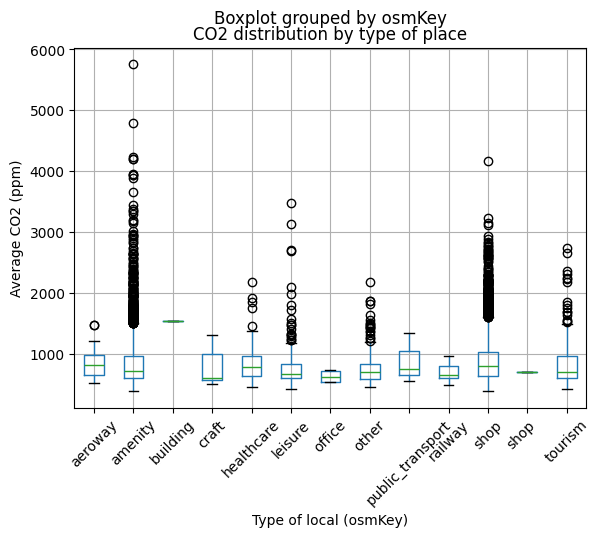

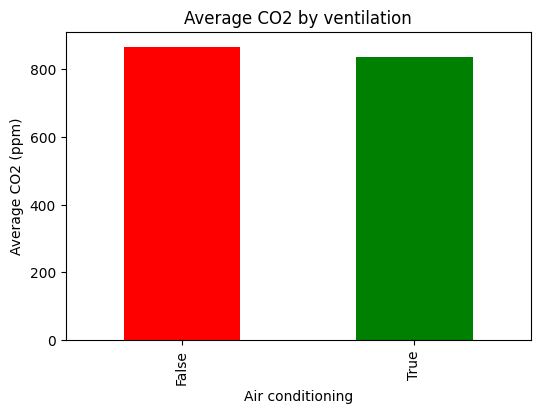

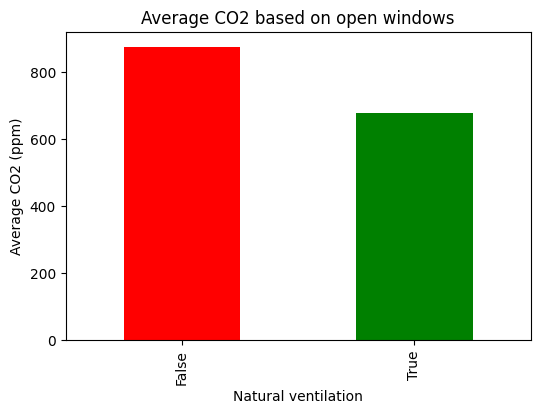

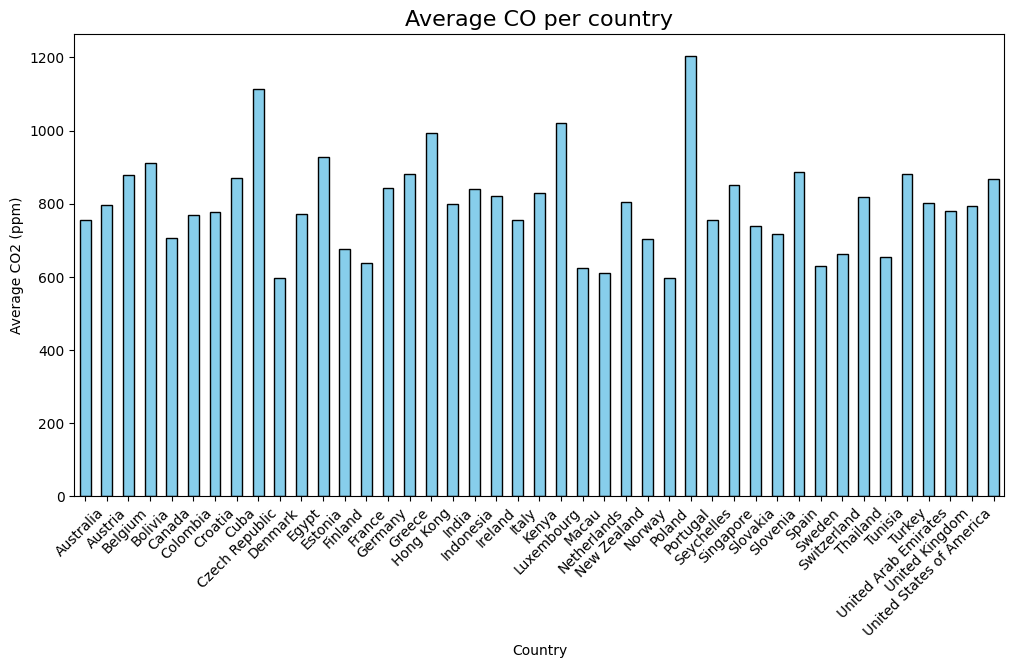

In [ ]:
# Plot # 1- Boxplot: CO2 distribution by type of place
plt.figure(figsize=(8,5))
indoorco2map.boxplot(column="co2readingsAvg", by="osmKey")
plt.title("CO2 distribution by type of place")
plt.xlabel("Type of local (osmKey)")
plt.ylabel("Average CO2 (ppm)")
plt.xticks(rotation=45)
plt.show()

# Plot # 2- Barplot: Average CO2 by ventilation
vent_means = indoorco2map.groupby("ventilationSystem")["co2readingsAvg"].mean()
plt.figure(figsize=(6,4))
vent_means.plot(kind="bar", color=["red","green"])
plt.title("Average CO2 by ventilation")
plt.xlabel("Air conditioning")
plt.ylabel("Average CO2 (ppm)")
plt.show()

# Plot # 3- Barplot: Average CO₂ according to open windows
window_means = indoorco2map.groupby("windowsOpen")["co2readingsAvg"].mean()
plt.figure(figsize=(6,4))
window_means.plot(kind="bar", color=["red","green"])
plt.title("Average CO2 based on open windows")
plt.xlabel("Natural ventilation")
plt.ylabel("Average CO2 (ppm)")
plt.show()

# Plot # 4- Barplot: Average CO₂ according country
prom_co2 = indoorco2map.groupby("countryName")["co2readingsAvg"].mean()

plt.figure(figsize=(12,6))
prom_co2.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Average CO2 per country", fontsize=16)
plt.ylabel("Average CO2 (ppm)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.show()

## Search Values

An algorithm is created to apply specific search filters. To do this, the characteristic (column) to be searched for is requested, e.g., `"osmKey"` and then the value of the desired record is entered, e.g., `"building"` The algorithm consists of a class whose first functional method creates a dataFrame with Pandas of only the filtered records, and the second method, when used, extracts the $CO_2$ reading values from the `"co2readings"` list, in addition to creating another array with NumPy where the timestamps are stored. These are calculated using the start time of the measurement `"startOfMeasurement"` and the measurement intervals `"interval"`. In this way, the minutes of the intervals are added to each $CO_2$ measurement.

In [3]:
# Class for searching and filtering data in the DataFrame
class DataScearch:
    def __init__(self, df):
        self.df = df

    def __call__(self, column, value):
        if column not in self.df.columns:
            
           raise ValueError(f"Column '{column}' does not exist in the DataFrame")

        elif self.df[column].dtype == "O":
            
            result = self.df[self.df[column].str.contains(value)]
            
        else:
        
            result = self.df[self.df[column] == value]
    
        return result
    
    # Method to extract CO2 readings and corresponding timestamps from the filtered DataFrame
    def __co2read__(self, result):

        if result.empty:
            raise ValueError("The filtered DataFrame is empty")
        
        co2_serie=result["co2readings"].dropna().tolist()
        co2_array= [val for sublist in co2_serie for val in sublist]
        co2_array = np.array(co2_array)

        start_time = pd.to_datetime(result.iloc[0]["startOfMeasurement"])
        interval = result.iloc[0]["interval"]

        time_array = pd.date_range(start=start_time, periods=len(co2_array), freq=f"{interval}min")
        
        return co2_array, time_array
    

In [25]:

scearch_column = input("\nSearching for a column in a DataFrame (default: osmKey):\n") or "osmKey"
scearch_value = input("Enter the value to search for (default: building):\n") or "building"
scearch = DataScearch(indoorco2map)
result = scearch(scearch_column, scearch_value)

print(f'\nSearch results in the column "{scearch_column}" for the value "{scearch_value}":\n')
print(result)



Search results in the column "osmKey" for the value "building":

     nwrtype      nwrID      name   latitude  longitude countryID countryName  \
8171       w  156920044  Bauforum  53.836031  10.698467       DEU     Germany   

     nuts3ID                 nuts3Name    osmKey   osmTag brand  \
8171   DEF03  Lübeck, Kreisfreie Stadt  building  college         

           startOfMeasurement windowsOpen ventilationSystem  \
8171  2025-03-20T15:55:32.356       False             False   

                                            customNotes  \
8171  Oberer Teil vom Bauforum bei einer Veranstaltung    

                                            co2readings  offset  interval  \
8171  [1524, 1569, 1566, 1549, 1575, 1529, 1544, 151...       0         1   

      co2readingsAvg  
8171            1538  


In [26]:
co2_data, time_data = scearch.__co2read__(result)
print(f'\nCO2 data extracted:\n{co2_data}')
print(f'\nTime data extracted:\n{time_data}')
print(f'\nThe length of the CO2 and time data is: {len(co2_data)}, {len(time_data)}\n')



CO2 data extracted:
[1524 1569 1566 1549 1575 1529 1544 1516 1507 1555 1531 1496]

Time data extracted:
DatetimeIndex(['2025-03-20 15:55:32.356000', '2025-03-20 15:56:32.356000',
               '2025-03-20 15:57:32.356000', '2025-03-20 15:58:32.356000',
               '2025-03-20 15:59:32.356000', '2025-03-20 16:00:32.356000',
               '2025-03-20 16:01:32.356000', '2025-03-20 16:02:32.356000',
               '2025-03-20 16:03:32.356000', '2025-03-20 16:04:32.356000',
               '2025-03-20 16:05:32.356000', '2025-03-20 16:06:32.356000'],
              dtype='datetime64[ns]', freq='min')

The length of the CO2 and time data is: 12, 12



## Matrix operations and derivatives

For this calculation process, the time array from the previous process, `"time_data"`, is converted to seconds. This array is of type datatime64 with nanosecond resolution and increments of minutes, to values strictly in seconds. Datatime64 data is a representation of date and time used by NumPy libraries. First, find the total duration of the measurement by subtracting the final time value of the last measurement from the time when the measurement began. Then, a special method was used to handle datatime64 dates. This method `"total_seconds()"` converts the datatime64 variable to seconds.

To determine whether $CO_2$ levels increase or decrease over the duration of the measurements in a given location, the first derivative is established as the change in concentration with respect to time, i.e., the rate of change, evaluating whether the change is significant or not. This may occur due to a change in the environment, such as the activation of ventilation, an increase in the number of people inside the premises, etc. And if the second derivative is performed, it is possible to see how quickly the $CO_2$ concentration increases or decreases, allowing an assessment of whether the change is effective or not.
The first and second derivatives were executed by calculating the difference between the next value and the previous one within an array, $\mathrm{np.diff}(y) = [\, y_{1} - y_{0},\; y_{2} - y_{1},\; \dots,\; y_{n} - y_{n-1} \,]$, this is done using the Numpy method, `np.diff()`, applied to the array of $CO_2$ measurements and the array of times, the derivative is calculated simply by dividing the differentials, $dCO_2/dTime$. For the second derivative, the length of the data in the time array is corrected, since when `np.diff()` is applied, being a difference between values, the length of the array is lost by 1. Therefore, when dividing by the time, which has a greater length, the correction must be made to take all values except the first.


In [27]:
# Class to convert time data to seconds
class TimeSeconds:
    def __init__(self, time_array):
        self.time_array = time_array
    
    def __call__(self):
        # Convert datatime64 and then to seconds
        delta = (self.time_array - self.time_array[0])
        time_seconds = delta.total_seconds() 
        return time_seconds


class Derivative:
    def __init__(self, x, t):
        self.x = x
        self.t = t
    
    def __call__(self):
        #diff is the discrete difference for the forward derivative
        dx = np.diff(self.x) 
        dt = np.diff(self.t)
        derivative = dx / dt
        return derivative

class SecondDerivative(Derivative):
    def __call__(self):
        first_derivative = super().__call__()
        dx2 = np.diff(first_derivative)
        dt = np.diff(self.t)[1:]  # Second derivative fit [All except the first]
        second_derivative = dx2 / dt
        return second_derivative

time_arrays = TimeSeconds(time_data)()
co2_derivative = Derivative(co2_data, time_arrays)()
co2_second_derivative = SecondDerivative(co2_data, time_arrays)()
print(f'\nFirst derivative of CO2 (ppm/s):\n{co2_derivative}')
print(f'\nSecond derivative of CO2 (ppm/s²):\n{co2_second_derivative}')
    


First derivative of CO2 (ppm/s):
[ 0.75       -0.05       -0.28333333  0.43333333 -0.76666667  0.25
 -0.46666667 -0.15        0.8        -0.4        -0.58333333]

Second derivative of CO2 (ppm/s²):
[-0.01333333 -0.00388889  0.01194444 -0.02        0.01694444 -0.01194444
  0.00527778  0.01583333 -0.02       -0.00305556]


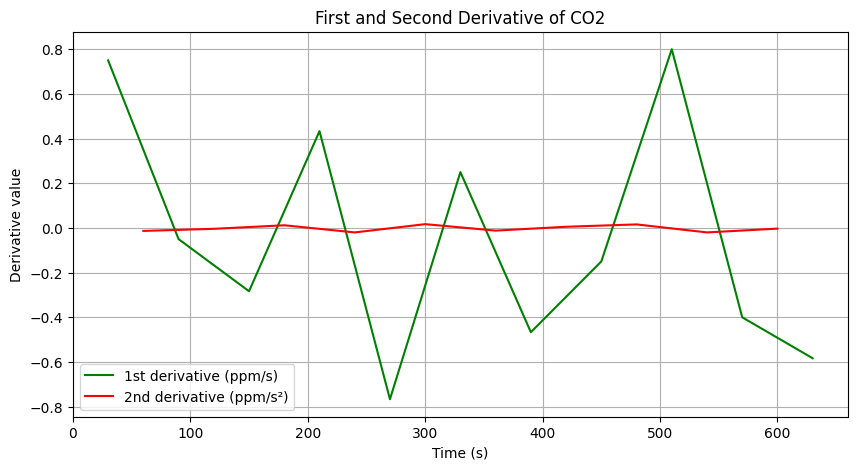

In [28]:
point_1 = (time_arrays[:-1] + time_arrays[1:]) / 2              # For the first derivative
point_2 = (point_1[:-1] + point_1[1:]) / 2              # For the second derivative

plt.figure(figsize=(10, 5))
plt.plot(point_1, co2_derivative, color='green', label="1st derivative (ppm/s)")
plt.plot(point_2, co2_second_derivative,  color='red', label="2nd derivative (ppm/s²)")

plt.title("First and Second Derivative of CO2")
plt.xlabel("Time (s)")
plt.ylabel("Derivative value")# For the same values of CO2 and time ppm/s and ppm/s^2
plt.grid(True)
plt.legend()
plt.show()

# Discussion of results

The database has a strong presence in European countries but is insufficient in other countries, meaning that data analysis is only possible for those locations. However, it allows for other types of analysis that are not possible with other types of databases, as most are based on atmospheric $CO_2$ and indoorco2map is the largest public database on $CO_2$ inside buildings, due to the large number of different buildings evaluated, and can carry out studies such as: The types of establishments that are most prone to accumulating $CO_2$ indoors, as well as determining the effectiveness of mechanical and natural ventilation systems in reducing gas concentrations, evaluating the times when $CO_2$ reaches its highest peaks, among many others.

With a superficial preview of some of the database characteristics, it can be seen that restaurants are the types of establishments with the highest accumulation of $CO_2$ (`"osmKey"="amenity"`), with their data showing greater dispersion towards high values, although their median (central data) remains below the $CO_2$ levels that affect health (1000ppm). Bar graphs also visually show that the effect of activating mechanical ventilation (air conditioning) does not represent a benefit as such in terms of the average $CO_2$ reduction, as the change is not considerable and remains close to 800ppm in both cases. On the other hand, natural ventilation showed a slightly greater improvement in reducing the average $CO_2$ level compared to mechanical ventilation, improving by 100ppm if windows are kept open instead of closed. However, this is practically an insignificant value.

The derivatives show changes in $CO_2$ concentrations in the measurements. When analyzing the first derivative, we find positive or negative peaks in the $ppm/s$ values of $CO_2$. This means there was a change rate, and the concentration varies. If this value remains constant, it means that the disturbance is consistent. It may be due to a peak time when more people entered the premises or the air conditioning systems were turned off, and it can represent a very serious danger if it continues over time, even if the value is very small. On the other hand, if it is only a spike that then declines, it means that the disturbance was sporadic, such as a draft, a nearby lighter, or other possibilities. The second derivative shows how fast the change in $CO_2$ concentration is happening, the acceleration of the change in $ppm/s^2$. If the acceleration remains almost always stable, close to $0$, it means that the $CO_2$ changes are almost always linear, and the increase is always the same amount over time. But if the acceleration has peaks and remains stable, it is a very critical event, since the event that is occurring at that moment has a high effectiveness in modifying the $CO_2$ in the space, and, if it is positive, it means that the accumulation of $CO_2$ in the premises is accelerating.

The values in the database are qualitative, except for the $CO_2$ measurement values `“co2reading”`, `“co2readingsAvg”`, and the variables associated with the times `‘startOfMeasurement’` and `“interval”`. $CO_2$ measurements are a separate list in each record and may have different lengths in each case. Matrix operations cannot be performed directly, as matrices require homogeneous dimensions to perform addition, subtraction, or multiplication between them. However, it is possible to apply statistical operations that do not depend on equal lengths, such as calculating averages and maximums, which allow records to be compared and analyzed without truncating or forcing the data structure.


# Conclusions

The database clearly shows that the average $CO_2$ levels in enclosed spaces or premises are significantly higher than atmospheric $CO_2$ levels, at $400ppm$ compared to $800ppm$ indoors. Most measurements show fluctuations in $CO_2$ concentration, but these are not sustained; they are single-pulse disturbances.

The assessment of the effects of ventilation in buildings is not consistent with the state of the art, as it is recommended that opening windows and turning on air conditioners help to reduce $CO_2$ accumulation. On the contrary, the indoorcomap database shows that the average $CO_2$ level when ventilation is present vs. when it is not does not represent a significant change.
 
The database is a great complement to atmospheric $CO_2$ studies, and if it could be combined with indoor analyses, a very comprehensive database with great predictive power could be created. One of the variables that can be included is the atmospheric $CO_2$ in that area of the world, as there are several cities that have higher ppm of $CO_2$ in their atmosphere, and this is a factor that seriously affects the $CO_2$ accumulated indoors. It is even a factor that slows down the ventilation capacity or reduces the amount of $CO_2$ in the premises. This, for example, can be evidenced by derivatives, and the rate of change can be found according to the atmospheric $CO_2$ in the area and the $CO_2$ present indoors.


# Bibliography

- Cox, J. D., Wagman, D. D., & Medvedev, V. A. (2025). CODATA Key Values for Thermodynamics. https://webbook.nist.gov/cgi/cbook.cgi?Source=1984COX%2FWAG1B&Units=SI&Mask=1

- Zhang, X. G., Abdul Raman, A. A., Jewaratnam, J., & Buthiyappan, A. (2024). Sustainable carbon dioxide capture, storage, and utilization: review of current status and future direction. International Journal of Environmental Science and Technology, 6125–6160. https://doi.org/10.1007/s13762-024-05908-x 

- World Health Organization Regional Offi ce for Europe. (2010a). SELECTED POLLUTANTS. WHO. www.euro.who.int 

- Lan, X., Tans, P., & K.W. (2025). Trends in globally-averaged CO2 determined from NOAA Global Monitoring Laboratory measurements

- NASA, N. A. and S. A. (2025). Carbon Dioxide. https://climate.nasa.gov/vital-signs/carbon-dioxide/?intent=121 

- Kim, C. S., Lim, Y. W., Yang, J. Y., Yang, J. Yy. J. Yy. J. Y., & Shin, D. C. (2002). EFFECT OF INDOOR CO 2 CONCENTRATIONS ON WHEEZING ATTACKS IN CHILDREN 
 
- History of OpenStreetMap. (2025, July 4). OpenStreetMap Wiki. Retrieved 16:18, September 13, 2025 from https://wiki.openstreetmap.org/w/index.php?title=History_of_OpenStreetMap&oldid=2871803 



